
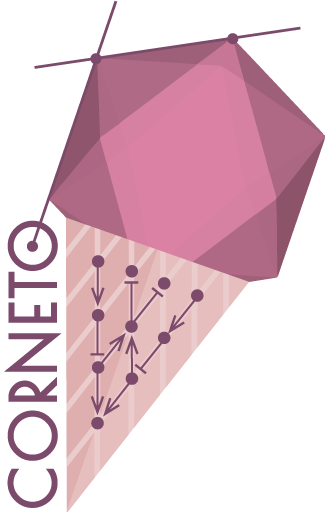

In [1]:
import corneto as cn
import numpy as np

cn.info()

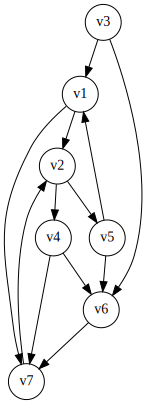

In [2]:
G_ex = cn.Graph()
G_ex.add_edges([
    ('v1','v2'),
    ('v1','v7'),
    ('v3','v1'),
    ('v2','v4'),
    ('v4','v6'),
    ('v4','v7'),
    ('v5','v6'),
    ('v6','v7'),
    ('v7','v2'),
    ('v2','v5'),
    ('v3','v6'),
    ('v5','v1')
])
G_ex.plot()

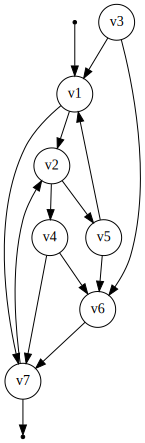

In [3]:
G = G_ex.copy()
G.add_edge((), 'v1')
G.add_edge('v7', ())
G.plot()

In [4]:
# We create an acyclic flow problem from the graph and we inspect the variables
P = cn.K.AcyclicFlow(G)
P.expr

{'_flow': Variable((14,), _flow),
 '_flow_ineg': Variable((14,), _flow_ineg, boolean=True),
 '_flow_ipos': Variable((14,), _flow_ipos, boolean=True),
 '_dag_layer_pos': Variable((7,), _dag_layer_pos),
 'positive_flow': Variable((14,), _flow_ipos, boolean=True),
 'negative_flow': Variable((14,), _flow_ineg, boolean=True),
 'with_flow': Expression(AFFINE, NONNEGATIVE, (14,)),
 'flow': Variable((14,), _flow)}

In [5]:
# Largest acyclic sub-graph
# TODO: Not intuitive to use _flow_ipos. Better to have a GraphProblem
# and we do sum(GP.edges), where edges links to _flow_ipos + _flow_ineg.
P.add_objectives(sum(P.expr.with_flow), weights=-1)
P.solve();

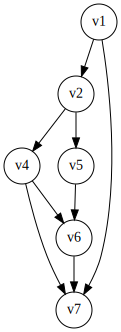

In [6]:
G.edge_subgraph(P.expr.with_flow.value > 0.5).plot(orphan_edges=False)

In [7]:
for vertex, position in zip(G.V, P.symbols["_dag_layer_pos"].value):
    print(vertex, int(position))

v1 0
v2 1
v7 4
v3 0
v4 2
v6 3
v5 2


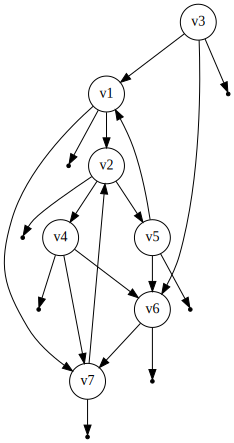

In [8]:
G = G_ex.copy()
flow_edges = []
for i in range(G.nv):
    flow_edges.append(G.add_edge(f"v{i+1}", ()))
G.plot()

In [9]:
lb = np.zeros(G.ne)
ub = 10*np.ones(G.ne)

# We will add a negative lower bound for
# the dummy edges that we added before
lb[flow_edges] = -10

In [10]:
P = cn.K.AcyclicFlow(G, lb=lb, ub=ub)
P.add_objectives(sum(P.expr.positive_flow), weights=-1)
P.solve();

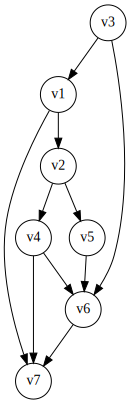

In [11]:
G.edge_subgraph(P.expr.with_flow.value > 0.5).plot(orphan_edges=False)